## Procesamiento Digital de Imagenes - TP3

### Constantes y Funciones

Importando bibliotecas

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

Definiendo constantes y funciones

In [ ]:
YIQ_transform_matrix = np.mat('0.299 0.587 0.114; 0.595716 -0.274453 -0.321263; 0.211456 -0.522591 0.311135')

In [ ]:
def RGB_to_YIQ(image_RGB):
  # Dimensiones de la x e y
  x_size = image_RGB.shape[0]
  y_size = image_RGB.shape[1]

  # Normalizo los valores de cada pixel
  normalized_imaged = image_RGB/255

  # Convierto la imagen RGB a YIQ
  image_yiq = np.zeros([x_size, y_size, 3])

  for px in range(0, x_size):
    for py in range(0, y_size):
      image_yiq[px, py, :] = np.dot( YIQ_transform_matrix, normalized_imaged[px , py ,:] )
  return image_yiq

In [ ]:
def YIQ_to_RGB(image_YIQ):
  # Dimensiones de la x e y
  x_size = image_YIQ.shape[0]
  y_size = image_YIQ.shape[1]

  # Matriz para transformar a RGB
  RGB_transform_matrix = np.linalg.inv(YIQ_transform_matrix)

  # Convierto la imagen YIQ a RGB
  image_rgb = np.zeros([x_size, y_size, 3])

  for px in range(0, x_size):
    for py in range(0, y_size):
      image_rgb[px, py, :] = np.dot( RGB_transform_matrix, image_YIQ[px , py ,:] )
  return image_rgb

### Carga de imagen y cambio al espacio YIQ

Cargando la imagen desde imageio

In [ ]:
image = imageio.imread('imageio:astronaut.png')

Dimensiones de la imagen

In [ ]:
image.shape

(512, 512, 3)

Graficando la imagen

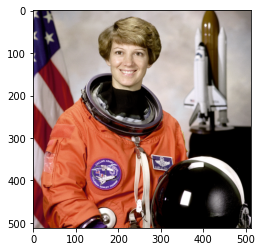

In [ ]:
plt.imshow(image)

Convirtiendo la imagen al espacio YIQ

In [ ]:
image_YIQ = RGB_to_YIQ(image)

### Filtro raiz cuadrada

In [ ]:
filter_sqrt_image_YIQ = np.copy( image_YIQ )

In [ ]:
filter_sqrt_image_YIQ[:, :, 0] = np.sqrt( filter_sqrt_image_YIQ[:, :, 0] )

In [ ]:
filter_sqrt_image_RGB = YIQ_to_RGB( filter_sqrt_image_YIQ )

Graficando la imagen y su posterior filtrado

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


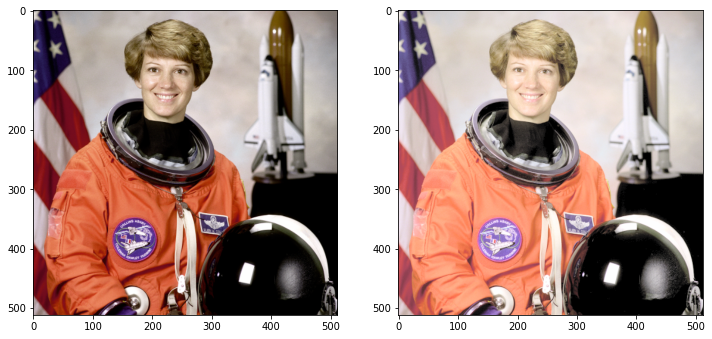

In [ ]:
_, axarr = plt.subplots(1, 2, figsize=(12,12))
axarr[0].imshow( image )
axarr[1].imshow( filter_sqrt_image_RGB )

### Filtro cuadratico

In [ ]:
filter_sqr_image_YIQ = np.copy( image_YIQ )

In [ ]:
filter_sqr_image_YIQ[:, :, 0] = np.square( filter_sqr_image_YIQ[:, :, 0] )

In [ ]:
filter_sqr_image_RGB = YIQ_to_RGB( filter_sqr_image_YIQ )

Graficando la imagen y su posterior filtrado

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


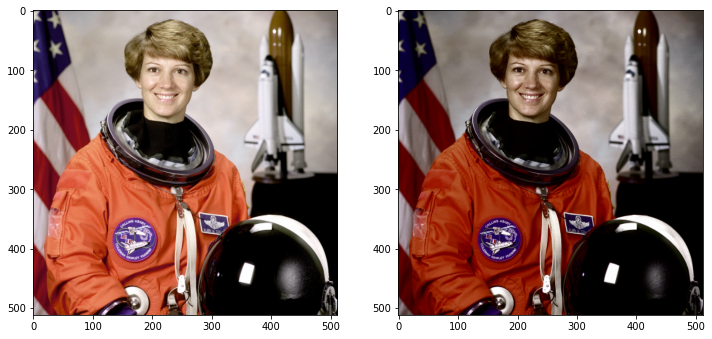

In [ ]:
_, axarr = plt.subplots(1, 2, figsize=(12,12))
axarr[0].imshow( image )
axarr[1].imshow( filter_sqr_image_RGB )

### Filtro lineal a trozos

In [ ]:
filter_image_YIQ = np.copy( image_YIQ )

In [ ]:
for vect in filter_image_YIQ[:,:,0]:
    for px in vect:
        if px > 0.8: px = 1
        if px < 0.2: px = 0
        px = px/0.8

In [ ]:
filter_image_RGB = YIQ_to_RGB( filter_image_YIQ )

Graficando la imagen y su posterior filtrado

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


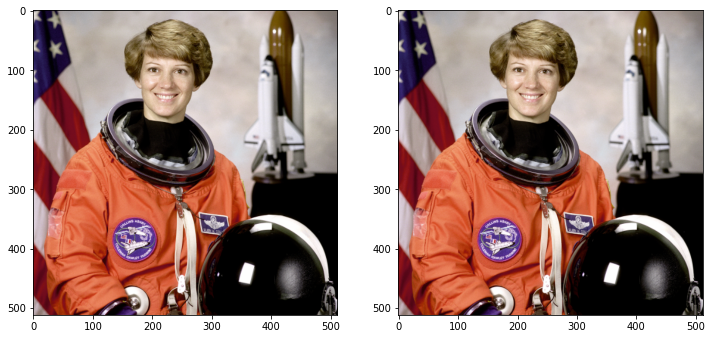

In [ ]:
_, axarr = plt.subplots(1, 2, figsize=(12,12))
axarr[0].imshow( image )
axarr[1].imshow( filter_image_RGB )